In [1]:
import numpy as np
from numpy import mean
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
data=pd.read_csv('./data/smoking_driking_dataset_Ver01.csv')

In [4]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [5]:
data.corr(method='pearson', numeric_only=True)

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
age,1.000000,-0.398501,-0.195337,0.127170,-0.172096,-0.167684,0.203021,0.198693,0.265530,0.108847,...,-0.104624,0.029497,0.043549,-0.173081,0.041497,0.022819,0.059408,-0.020506,0.017391,-0.126031
height,-0.398501,1.000000,0.668823,0.263945,0.139141,0.138529,-0.081159,-0.082456,0.035030,0.108780,...,-0.148599,-0.015450,0.137611,0.531898,0.002298,0.171256,0.039203,0.144842,0.162340,0.467317
weight,-0.195337,0.668823,1.000000,0.637173,0.088901,0.088707,-0.044498,-0.045709,0.250770,0.277891,...,-0.287688,0.067859,0.283774,0.499491,0.029281,0.153885,0.099652,0.276440,0.221881,0.366499
waistline,0.127170,0.263945,0.637173,1.000000,0.004511,0.006158,0.033224,0.031012,0.272323,0.240890,...,-0.253988,0.063416,0.249436,0.291730,0.043132,0.098421,0.096858,0.212267,0.186988,0.205485
sight_left,-0.172096,0.139141,0.088901,0.004511,1.000000,0.307985,-0.039428,-0.040998,-0.035617,-0.001209,...,-0.004224,0.003013,0.010599,0.085896,-0.010253,0.020309,-0.005427,0.018815,0.013566,0.064194
sight_right,-0.167684,0.138529,0.088707,0.006158,0.307985,1.000000,-0.040764,-0.038895,-0.033994,-0.000568,...,-0.006259,0.002155,0.012265,0.086847,-0.010897,0.021447,-0.004600,0.018920,0.016491,0.065051
hear_left,0.203021,-0.081159,-0.044498,0.033224,-0.039428,-0.040764,1.000000,0.536890,0.056065,0.006893,...,-0.029464,-0.014621,0.002095,-0.036058,0.019754,0.015254,0.011283,-0.007907,0.002991,-0.021245
hear_right,0.198693,-0.082456,-0.045709,0.031012,-0.040998,-0.038895,0.536890,1.000000,0.057436,0.007524,...,-0.028046,-0.013438,0.002155,-0.036703,0.018264,0.012959,0.010763,-0.008687,0.003548,-0.022330
SBP,0.265530,0.035030,0.250770,0.272323,-0.035617,-0.033994,0.056065,0.057436,1.000000,0.741131,...,-0.111772,0.033619,0.186003,0.166530,0.063518,0.062605,0.081478,0.117613,0.161434,0.084918
DBP,0.108847,0.108780,0.277891,0.240890,-0.001209,-0.000568,0.006893,0.007524,0.741131,1.000000,...,-0.093838,0.066984,0.198651,0.241980,0.046054,0.057053,0.078555,0.131320,0.175610,0.126849


In [7]:
data['sex'].value_counts()

Male      526415
Female    464931
Name: sex, dtype: int64

In [ ]:
data.describe()

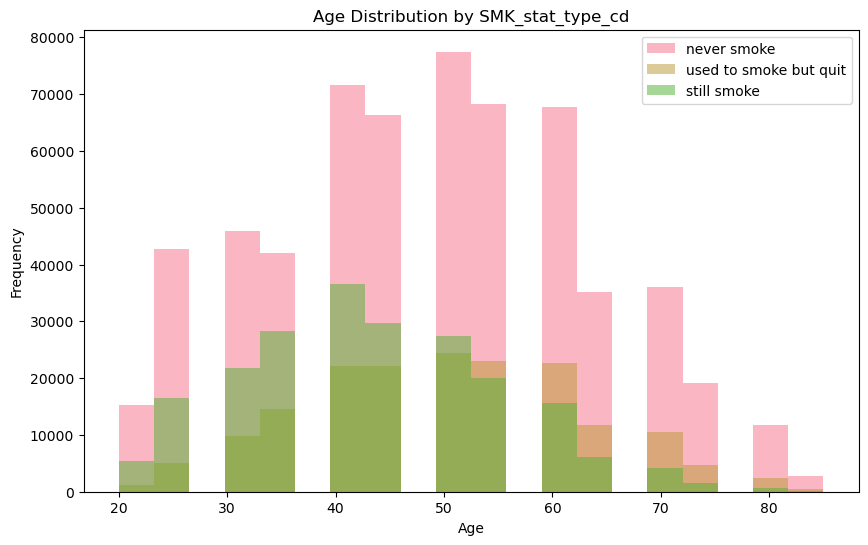

In [11]:
# Filter data based on DRK_YN values
smk_1 = data[data['SMK_stat_type_cd'] == 1]
smk_2 = data[data['SMK_stat_type_cd'] == 2]
smk_3 = data[data['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'], bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'], bins=20, alpha=0.5, label='used to smoke but quit')
plt.hist(smk_3['age'], bins=20, alpha=0.5, label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()